In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
import press_start_wrangle

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

In [2]:
games = press_start_wrangle.acquire_and_prep()

In [3]:
games

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales,age_bins
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,16,41.25,middle_aged
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,37,11.16,old_af
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,14,19.98,middle_aged
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,13,17.25,middle_aged
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,26,20.11,old_af
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,2051,Oshare Majo Love and Berry: DS Collection,DS,2006,Misc,Sega,0.00,0.00,1.01,0.00,1.01,16,1.01,middle_aged
2050,2052,Monster Rancher,PS,1997,Simulation,Tecmo Koei,0.12,0.08,0.74,0.07,1.01,25,0.89,old_af
2051,2053,The LEGO Movie Videogame,PS3,2014,Action,Warner Bros. Interactive Entertainment,0.33,0.48,0.02,0.18,1.01,8,0.68,noob
2052,2054,DiRT 2,PS3,2009,Racing,Codemasters,0.27,0.53,0.00,0.20,1.01,13,0.73,middle_aged


In [4]:
train, validate, test = press_start_wrangle.split_data(games)

In [5]:
train.shape, validate.shape, test.shape

((1136, 14), (488, 14), (407, 14))

In [6]:
train

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,age,combined_sales,age_bins
2030,2032,Shrek 2,GC,2004,Platform,Activision,0.73,0.26,0.01,0.03,1.02,18,0.30,middle_aged
1329,1331,Dragon Quest Monsters: Joker 2,DS,2010,Role-Playing,Square Enix,0.11,0.08,1.24,0.02,1.45,12,1.34,noob
1670,1672,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,1.20,7,0.69,noob
961,963,Sly 2: Band of Thieves,PS2,2004,Platform,Sony Computer Entertainment,0.88,0.69,0.00,0.23,1.81,18,0.92,middle_aged
1228,1230,Dead Space 2,X360,2011,Shooter,Electronic Arts,0.94,0.45,0.00,0.13,1.52,11,0.58,noob
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,727,New Super Luigi U,WiiU,2013,Platform,Nintendo,1.27,0.62,0.18,0.16,2.22,9,0.96,noob
1330,1332,Tony Hawk's American Wasteland (Weekly america...,PS2,2005,Sports,Activision,1.38,0.05,0.00,0.02,1.45,17,0.07,middle_aged
1961,1963,Seek and Destroy,PS2,2002,Racing,Play It,0.52,0.40,0.00,0.14,1.06,20,0.54,old_af
909,911,Need for Speed Rivals,PS4,2013,Racing,Electronic Arts,0.73,0.91,0.03,0.22,1.89,9,1.16,noob


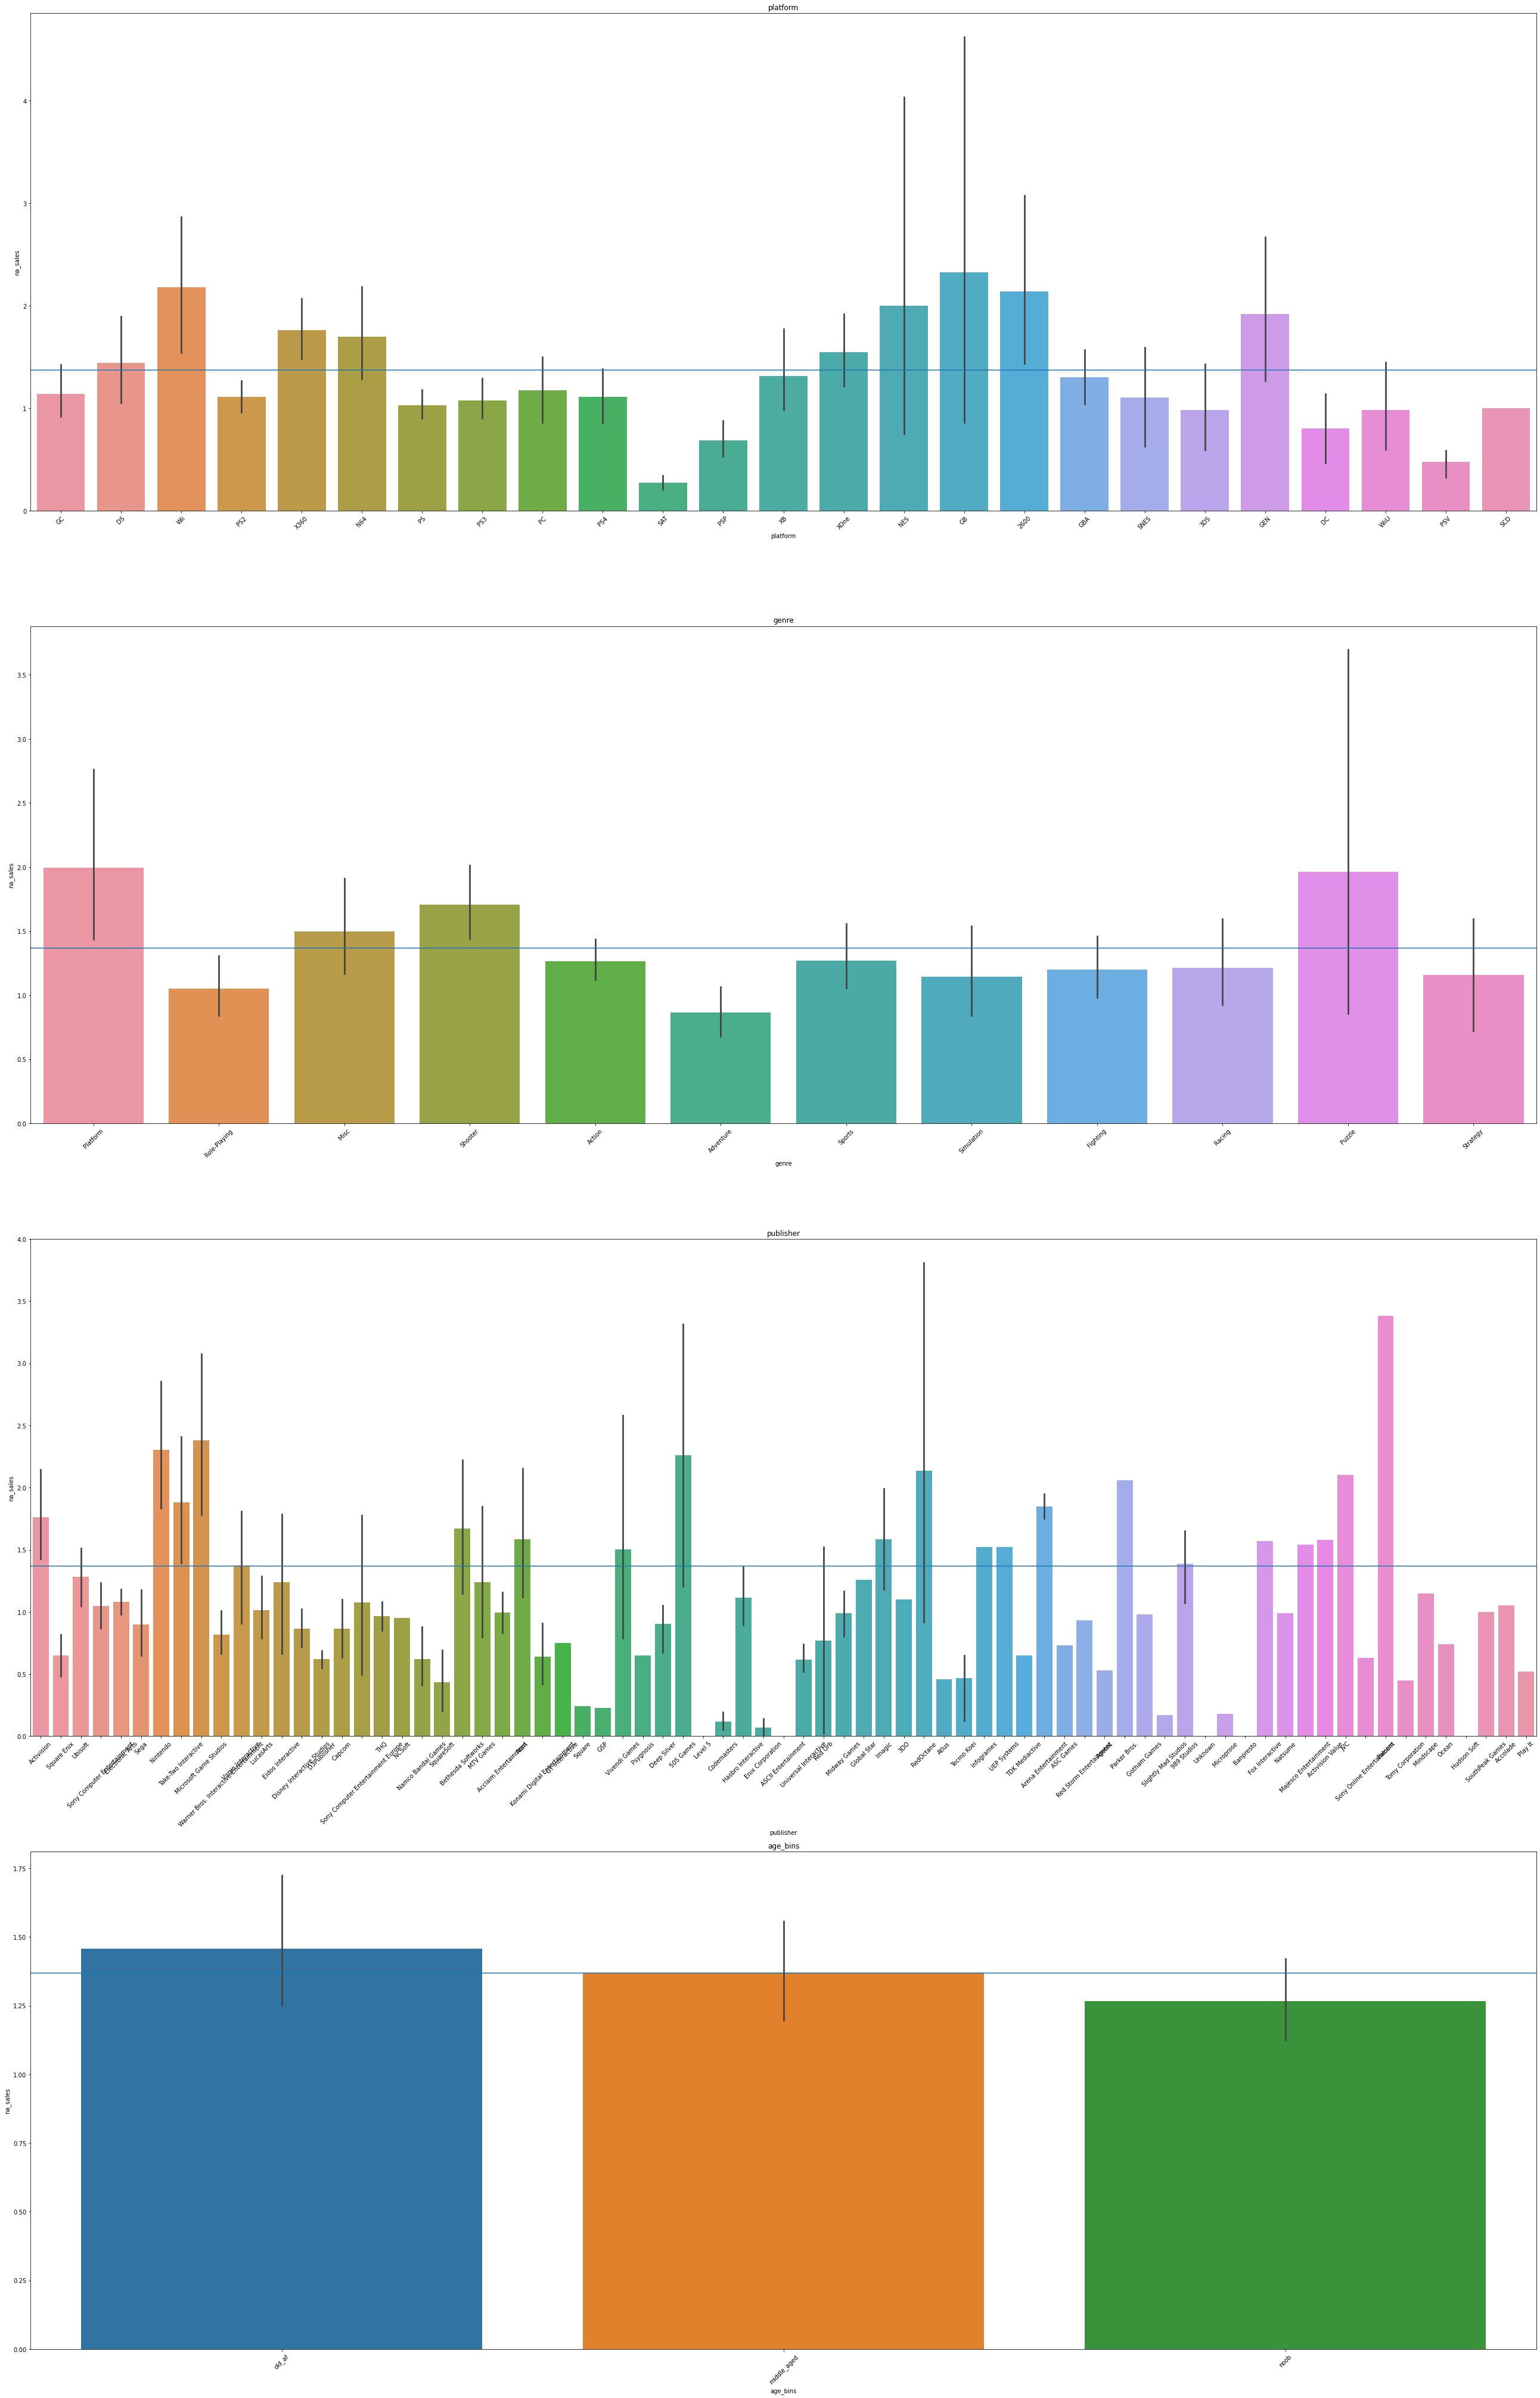

In [7]:
press_start_wrangle.qualitative_boxplot(train)

In [8]:
press_start_wrangle.qualitative_stats_test(train)

2.112860117006087 0.018772802726588284
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Activision's average sales are greater than the population average.
3.5460895289171726 0.00024479672795653585
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Nintendo's average sales are greater than the population average.
1.9029818253077373 0.03124044531412377
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Take-Two Interactive's average sales are greater than the population average.
3.133044985794307 0.0018082964891023732
We reject the null hypothesis. There is sufficient evidence to move forward with the understanding that Microsoft Game Studios's average sales are greater than the population average.
1.0086631127134522 0.16740457357043442
We reject the null hypothesis. There is sufficient evidence to move forward with the understa